In [6]:
import numpy as np
import pandas as pd


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, accuracy_score, balanced_accuracy_score

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

## 1.EDA


In [12]:
df_churn=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\churn.csv")
df_churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Tranform some of the binary features from numerical (0/1) to categorical for better interpretability and visualization.

In [14]:
df_churn.rename(columns={'HasCrCard': 'Credit Card Status', 'IsActiveMember': 'Activity', 'Exited': 'Status'}, inplace=True)
df_churn.Status = df_churn.Status.map({0: 'Retained', 1: 'Exited'})
df_churn['Credit Card Status'] = df_churn['Credit Card Status'].map({0: 'No Credit Card', 1: 'Has Credit Card'})
df_churn.Activity = df_churn.Activity.map({0: 'Inactive', 1: 'Active'})
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Credit Card Status,Activity,EstimatedSalary,Status
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Has Credit Card,Active,101348.88,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No Credit Card,Active,112542.58,Retained
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Has Credit Card,Inactive,113931.57,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No Credit Card,Inactive,93826.63,Retained
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Has Credit Card,Active,79084.10,Retained


<AxesSubplot:>

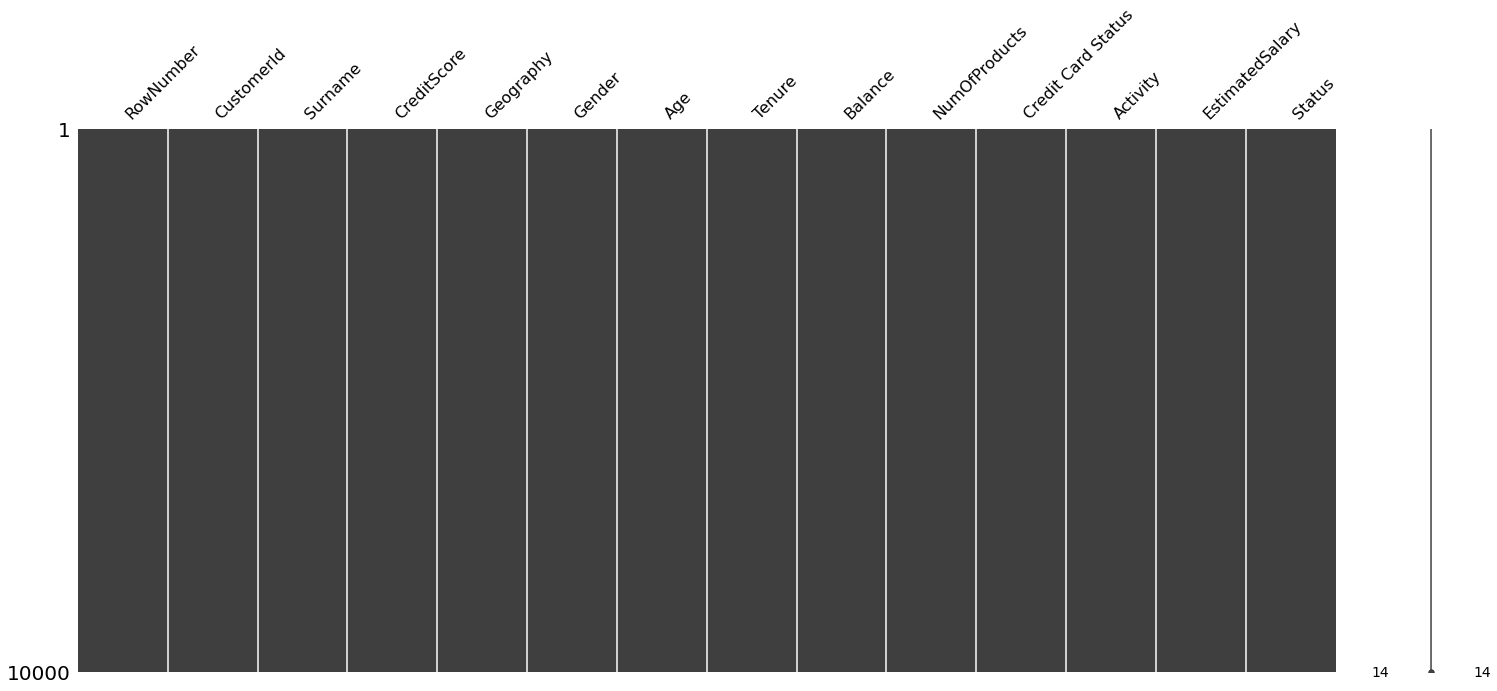

In [15]:
# Check missing values
msno.matrix(df_churn)



In [16]:
##Matrix :
##Using this matrix you can very quickly find the pattern of missingness in the dataset.
##No missing value.

### Let's look at the division of male and female customers.

In [20]:

px.pie(df_churn, names='Gender', hole=0.5)


In [21]:
px.pie(df_churn, names='Geography', hole=0.5)


In [22]:
px.histogram(df_churn, x='Age', color='Status')


In [23]:
px.pie(df_churn,names='Status',title='Percentage Churn', hole=0.5)

In [24]:
px.histogram(df_churn, x='CreditScore', color='Status')

In [25]:
px.box(df_churn, x='Tenure', color='Status')

In [26]:
px.histogram(df_churn, x='Balance', color='Status')

In [27]:
px.histogram(df_churn, x='EstimatedSalary', color='Status')


In [28]:
fig = px.sunburst(df_churn, path=['Credit Card Status', 'Status'])
fig.update_traces(textinfo='label + percent parent')

In [29]:
fig = px.sunburst(df_churn, path=['Activity', 'Status'])
fig.update_traces(textinfo='label + percent parent')

In [30]:
fig = px.sunburst(df_churn, path=['NumOfProducts', 'Status'])
fig.update_traces(textinfo='label + percent parent')

## 2 Preprocessing and Feature engineering

In [31]:
#Drop unnecessary columns
df_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'Credit Card Status', 'Activity', 'EstimatedSalary', 'Status'],
      dtype='object')

In [32]:
df_churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Credit Card Status,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1,Has Credit Card,Active,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No Credit Card,Active,112542.58,Retained
2,502,France,Female,42,8,159660.80,3,Has Credit Card,Inactive,113931.57,Exited
3,699,France,Female,39,1,0.00,2,No Credit Card,Inactive,93826.63,Retained
4,850,Spain,Female,43,2,125510.82,1,Has Credit Card,Active,79084.10,Retained


In [33]:
# Need to handle the categorical features. For this, we create a binary encoding for each class in each categorical feature.
pd.get_dummies(df_churn)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Credit Card Status_Has Credit Card,Credit Card Status_No Credit Card,Activity_Active,Activity_Inactive,Status_Exited,Status_Retained
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,1,0,1,0,1,0
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,0,1,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,0,1,0,1,0,1
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,1,0,0,0,1,1,0,0,1,0,1
9996,516,35,10,57369.61,1,101699.77,1,0,0,0,1,1,0,1,0,0,1
9997,709,36,7,0.00,1,42085.58,1,0,0,1,0,0,1,1,0,1,0
9998,772,42,3,75075.31,2,92888.52,0,1,0,0,1,1,0,0,1,1,0


In [34]:
X = df_churn.iloc[:, :-1]
X = pd.get_dummies(X)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Credit Card Status_Has Credit Card,Credit Card Status_No Credit Card,Activity_Active,Activity_Inactive
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,1,0,1,0
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,1,0,0,1
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,0,1,0,1
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,1,0,1,0


In [35]:
y = df_churn.Status


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3 Logistic Regression Model

In [37]:
#Training
lr_model = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, class_weight='balanced',
                              random_state=42, solver='lbfgs', max_iter=100, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# Fit to train data
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [38]:
y_pred = lr_model.predict(X_test)

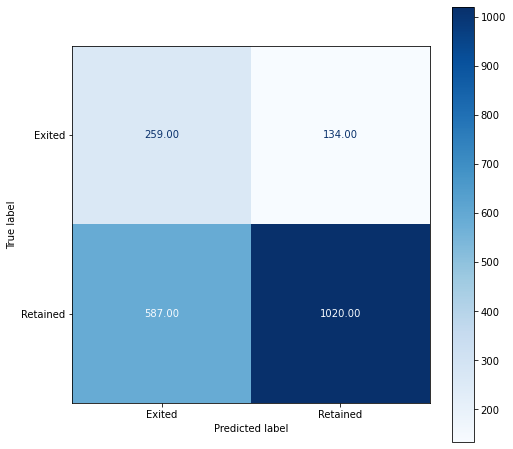

In [44]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(confusion, display_labels=lr_model.classes_).plot(cmap='Blues', ax=ax, values_format=".2f")
plt.show()




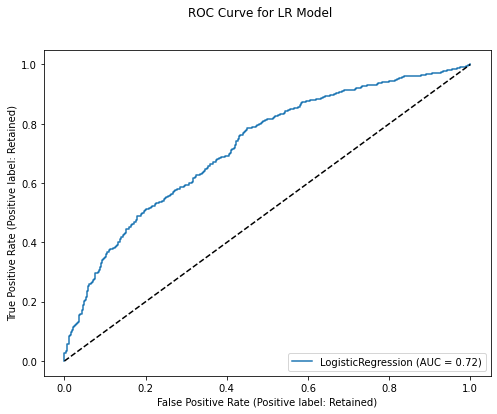

In [47]:


# Create a figure and axis for the ROC curve plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ROC curve for the logistic regression model
plot_roc_curve(lr_model, X_test, y_test, ax=ax)

# Add a diagonal line for reference
ax.plot([0, 1], [0, 1], 'k--')

# Set the plot title
fig.suptitle('ROC Curve for LR Model')

# Show the ROC curve plot
plt.show()

In [48]:
y_pred_prob = lr_model.predict_proba(X_test) 
roc_auc_score(y_test, y_pred_prob[:, 1])

0.7201714509200365

### While the current classifier exhibits some level of accuracy, it may not be a strong performer. We have the option to investigate more complex and advanced models that could potentially yield improved classification results.

## 4 Decision Tree Model

In [49]:
# Initialize model with parameters
dt_model = DecisionTreeClassifier(max_depth=30, min_samples_split=50, min_samples_leaf=25, 
                                  max_leaf_nodes=100, class_weight='balanced', ccp_alpha=0.0001)
# Fit model to training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', max_depth=30,
                       max_leaf_nodes=100, min_samples_leaf=25,
                       min_samples_split=50)

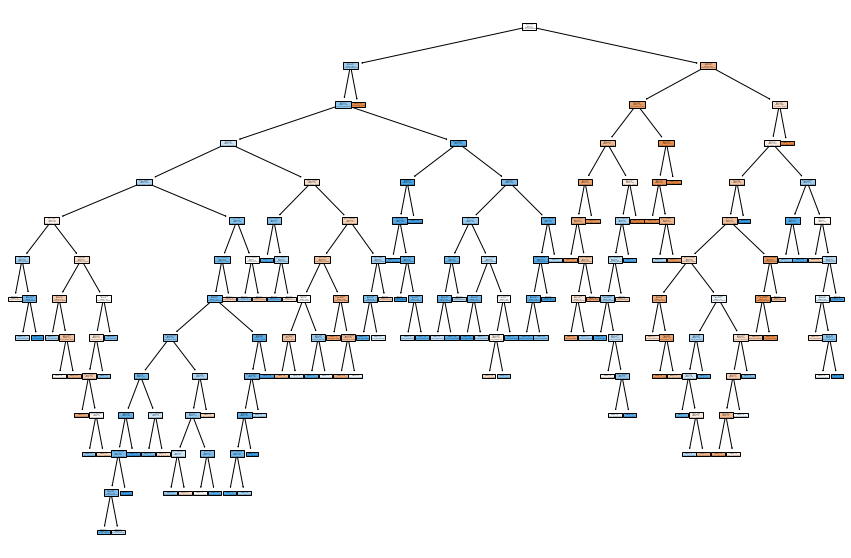

In [50]:
# Plot tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True)
plt.show()

In [51]:
# Use trained model to make predictions on test data
y_pred = dt_model.predict(X_test)

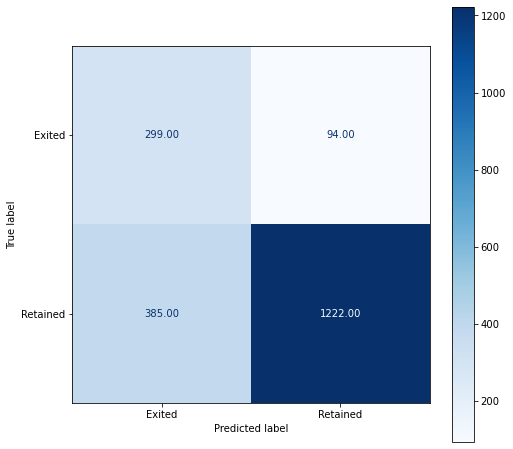

In [54]:
#Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion, display_labels=lr_model.classes_)

# Plot the confusion matrix with decimal precision and normalize it
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', ax=ax, values_format=".2f", include_values=True, xticks_rotation='horizontal')

# Show the plot
plt.show()

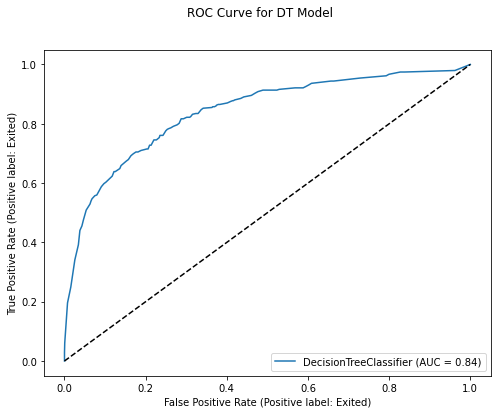

In [56]:
# Create a figure and axis for the ROC curve plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ROC curve for the decision tree model
plot_roc_curve(dt_model, X_test, y_test, pos_label='Exited', ax=ax)

# Add a diagonal line for reference
ax.plot([0, 1], [0, 1], 'k--')

# Set the plot title
fig.suptitle('ROC Curve for DT Model')

# Show the ROC curve plot
plt.show()



In [57]:
# Calculate area under roc curve
y_pred_prob = dt_model.predict_proba(X_test) 
roc_auc_score(y_test, y_pred_prob[:, 1])

0.8392718877810343

In [59]:
feature_importances = dt_model.feature_importances_
feature_names = X.columns  # Replace with your actual feature names

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Create a bar chart using Plotly Express
fig = px.bar(importance_df, x='Feature', y='Importance')

# Customize the appearance of the chart (e.g., axis labels, title)
fig.update_layout(title='Feature Importances for Decision Tree Model', xaxis_title='Feature', yaxis_title='Importance')

# Show the plot
fig.show()

## The most important feature being age, followed by number of products subscribed and balance.